# Exploratory Data Analysis - GTSRB Dataset

### Import libraries and set working directory

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.offsetbox as offsetbox
from matplotlib.patches import Rectangle
import random

### Set up Kaggle API
Must have kaggle.json file ready to upload

In [31]:
!pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600  ~/.kaggle/kaggle.json

!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

import zipfile

filename = '/content/gtsrb-german-traffic-sign.zip'

with zipfile.ZipFile(filename, 'r') as zip_ref:
  zip_ref.extractall('.')

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


### Set directory

In [32]:
meta = pd.read_csv('Meta.csv')
test = pd.read_csv('Test.csv')
train = pd.read_csv('Train.csv')

---

## Dataset Overview

### View data in .csv files

In [33]:
print('Meta:')
print('Length:', len(meta))
print(meta.head())

print('\nTrain:')
print('Length:', len(train))
print(train.head())

print('\nTest:')
print('Length:', len(test))
print(test.head())

Meta:
Length: 43
          Path  ClassId  ShapeId  ColorId SignId
0  Meta/27.png       27        0        0   1.32
1   Meta/0.png        0        1        0   3.29
2   Meta/1.png        1        1        0   3.29
3  Meta/10.png       10        1        0   3.27
4  Meta/11.png       11        0        0   1.22

Train:
Length: 39209
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  

Test:
Length: 12630
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId      

### Listing Image Classes
Creating dictionary with class labels provided in GTSRB dataset

In [34]:
class_labels = {
    0:	'Speed limit (20km/h)',
    1:	'Speed limit (30km/h)',
    2:	'Speed limit (50km/h)',
    3:	'Speed limit (60km/h)',
    4:	'Speed limit (70km/h)',
    5:	'Speed limit (80km/h)',
    6:	'End of speed limit (80km/h)',
    7:	'Speed limit (100km/h)',
    8:	'Speed limit (120km/h)',
    9:	'No passing',
    10:	'No passing for vehicles over 3.5 metric tons',
    11:	'Right-of-way at the next intersection',
    12:	'Priority road',
    13:	'Yield',
    14:	'Stop',
    15:	'No vehicles',
    16:	'Vehicles over 3.5 metric tons prohibited',
    17:	'No entry',
    18:	'General caution',
    19:	'Dangerous curve to the left',
    20:	'Dangerous curve to the right',
    21:	'Double curve',
    22:	'Bumpy road',
    23:	'Slippery road',
    24:	'Road narrows on the right',
    25:	'Road work',
    26:	'Traffic signals',
    27:	'Pedestrians',
    28:	'Children crossing',
    29:	'Bicycles crossing',
    30:	'Beware of ice/snow',
    31:	'Wild animals crossing',
    32:	'End of all speed and passing limits',
    33:	'Turn right ahead',
    34:	'Turn left ahead',
    35:	'Ahead only',
    36:	'Go straight or right',
    37:	'Go straight or left',
    38:	'Keep right',
    39:	'Keep left',
    40:	'Roundabout mandatory',
    41:	'End of no passing',
    42:	'End of no passing by vehicles over 3.5 metric tons'
}

### Distribution of Classes

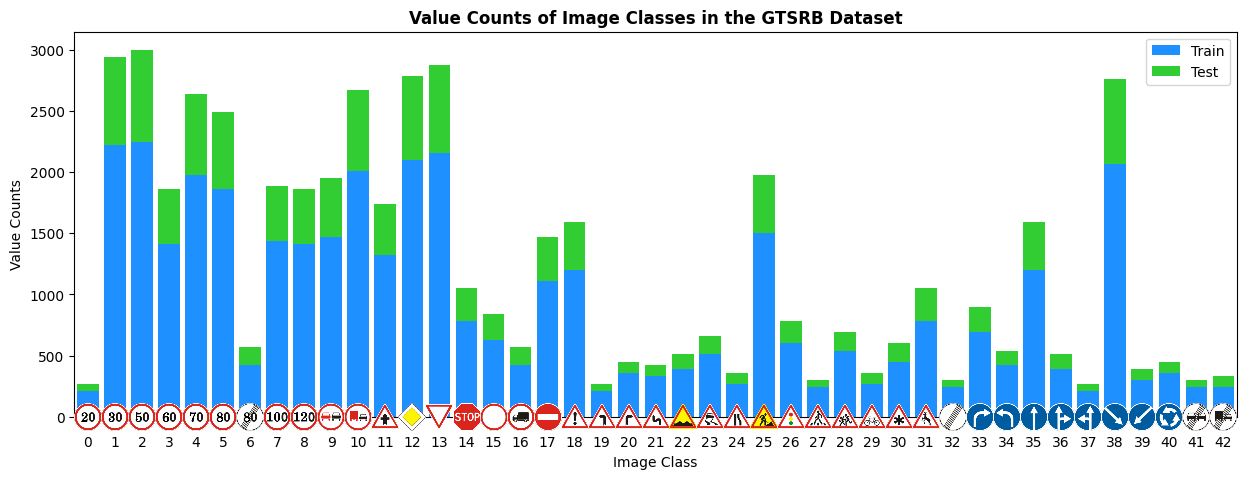

In [35]:
test_class_value_counts = test['ClassId'].value_counts().sort_index()
train_class_value_counts = train['ClassId'].value_counts().sort_index()

icons = [os.path.join('Meta', (str(x) + '.png')) for x in range(43)]
tick_icons = [offsetbox.OffsetImage(plt.imread(icon), zoom = 0.2) for icon in icons]

fig, ax = plt.subplots(figsize = (15, 5))
ax.bar(train_class_value_counts.index, train_class_value_counts.values, color = 'dodgerblue', label = 'Train')
ax.bar(test_class_value_counts.index, test_class_value_counts.values, bottom = train_class_value_counts.values, color = 'limegreen', label = 'Test')
ax.set_xticks(train_class_value_counts.index)

for tick_icon, index in zip(tick_icons, train_class_value_counts.index):
    icon = offsetbox.AnnotationBbox(tick_icon, (index, 0), frameon = False)
    ax.add_artist(icon)

ax.set_xticks(range(len(test_class_value_counts)))
ax.tick_params(axis = 'x', pad = 10)
ax.set_title('Value Counts of Image Classes in the GTSRB Dataset', fontweight = 'bold')
ax.set_ylabel('Value Counts')
ax.set_xlabel('Image Class')
ax.legend()
ax.set_xlim(-0.5, 42.5)

plt.show()

### Class Shapes and Colours

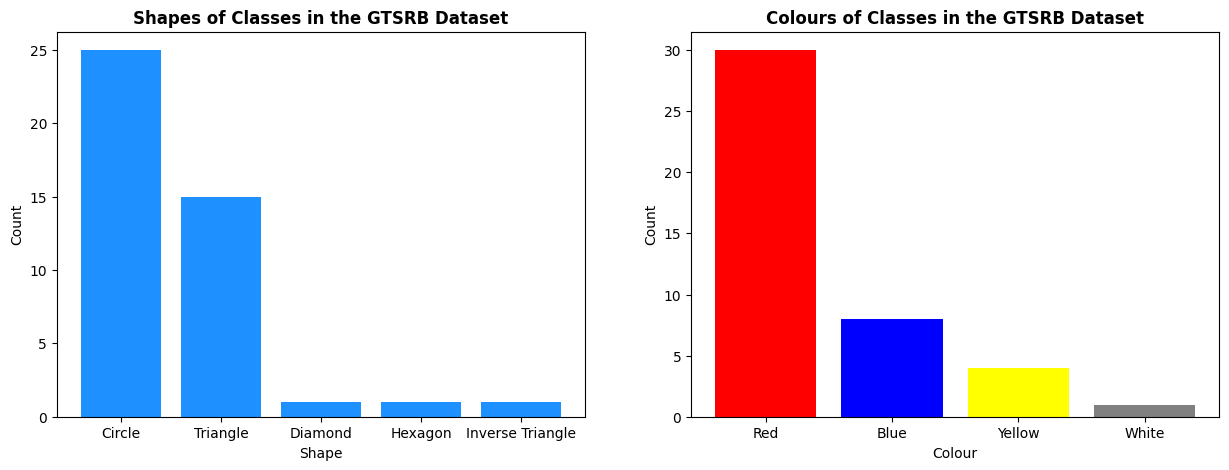

In [36]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.bar(x = range(len(meta['ShapeId'].unique())), height = meta['ShapeId'].value_counts(), color = 'dodgerblue')
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['Circle', 'Triangle', 'Diamond', 'Hexagon', 'Inverse Triangle'])
plt.xlabel('Shape')
plt.ylabel('Count')
plt.title('Shapes of Classes in the GTSRB Dataset', fontweight = 'bold')

plt.subplot(1, 2, 2)
plt.bar(x = range(len(meta['ColorId'].unique())), height = meta['ColorId'].value_counts(), color = ['Red', 'Blue', 'Yellow', 'Gray'])
plt.xticks(ticks = [0, 1, 2, 3], labels = ['Red', 'Blue', 'Yellow', 'White'])
plt.xlabel('Colour')
plt.ylabel('Count')
plt.title('Colours of Classes in the GTSRB Dataset', fontweight = 'bold')
plt.show()

### Distribution of Image Dimensions

In [37]:
train[['Height', 'Width']].describe()

,Height,Width
count,39209.000000,39209.000000
mean,50.328930,50.835880
std,23.115423,24.306933
min,25.000000,25.000000
25%,35.000000,35.000000
50%,43.000000,43.000000
75%,58.000000,58.000000
max,225.000000,243.000000


In [38]:
test[['Height', 'Width']].describe()

,Height,Width
count,12630.000000,12630.000000
mean,50.364450,50.507759
std,23.698908,25.088483
min,25.000000,25.000000
25%,35.000000,34.000000
50%,43.000000,43.000000
75%,57.000000,58.000000
max,232.000000,266.000000


#### Height

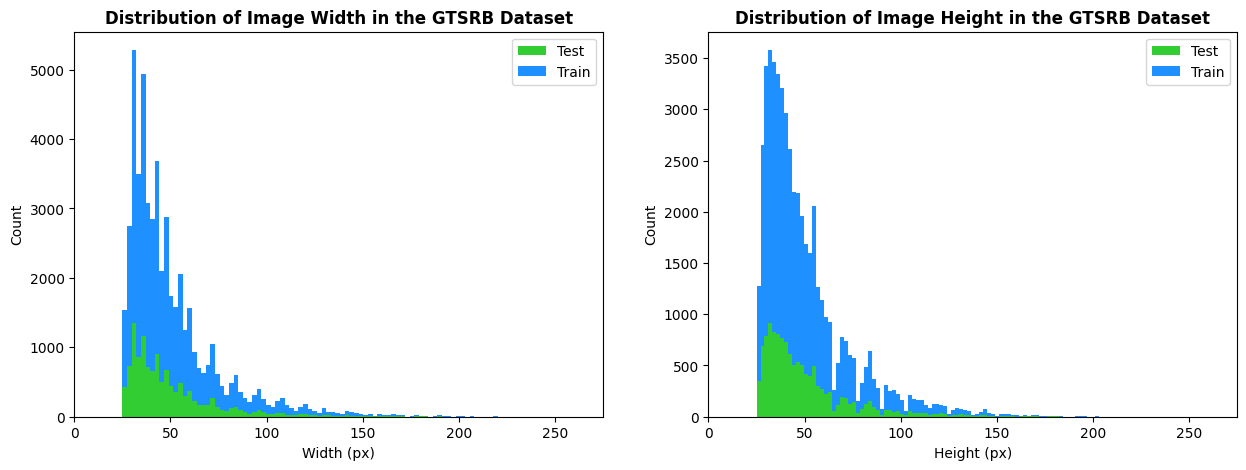

In [39]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.hist([test['Width'], train['Width']], stacked = True, bins = 100, color = ['limegreen', 'dodgerblue'], label = ['Test', 'Train'])
plt.xlim(left = 0, right = 275)
plt.xlabel('Width (px)')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Image Width in the GTSRB Dataset', fontweight = 'bold')

plt.subplot(1, 2, 2)
plt.hist([test['Height'], train['Height']], stacked = True, bins = 100, color = ['limegreen', 'dodgerblue'], label = ['Test', 'Train'])
plt.xlim(left = 0, right = 275)
plt.xlabel('Height (px)')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Image Height in the GTSRB Dataset', fontweight = 'bold')
plt.show()

## Visualisation

### Visualising images in Train dataset

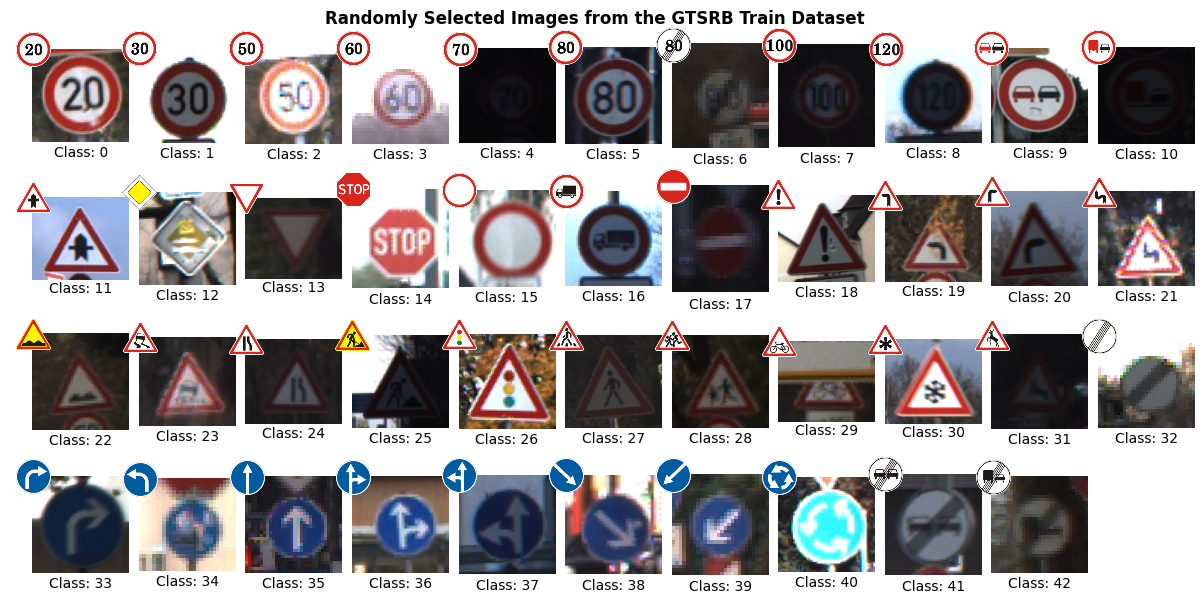

In [40]:
icons = [os.path.join('Meta', (str(x) + '.png')) for x in range(43)]
icons = [offsetbox.OffsetImage(plt.imread(icon), zoom = 0.25) for icon in icons]

fig, axes = plt.subplots(4, 11, figsize = (15, 7))

for image_class in range(43):
    train_image_paths = os.listdir(os.path.join('Train', str(image_class)))
    image_path = os.path.join('Train', str(image_class), random.sample(train_image_paths, 1)[0])
    image = plt.imread(image_path)

    row = image_class // 11
    col = image_class % 11
    ax = axes[row][col]
    
    ax.imshow(image)
    ax.axis('off')
    icon = offsetbox.AnnotationBbox(icons[image_class], (0, 0), frameon = False)
    ax.add_artist(icon)
    ax.text(0.5, -0.15, ('Class: ' + str(image_class)), transform=ax.transAxes, fontsize=10, ha='center')

axes[3][10].axis('off') # Remove axis for empty value

plt.subplots_adjust(wspace = 0.1, hspace = 0.3)
fig.suptitle('Randomly Selected Images from the GTSRB Train Dataset', fontweight = 'bold', y = 0.925)
plt.show()

### Visualising images in Test dataset

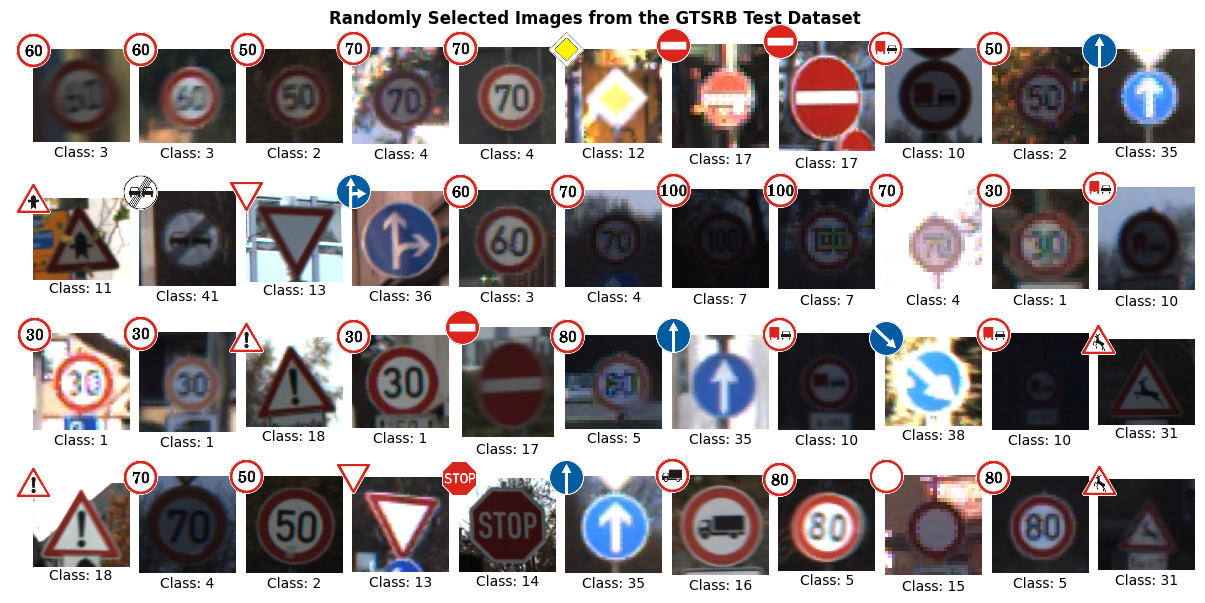

In [41]:
test_image_paths = os.listdir('Test')
selected_images = [os.path.join('Test', path) for path in random.sample(test_image_paths, 44)]

icons = [os.path.join('Meta', (str(x) + '.png')) for x in range(43)]
icons = [offsetbox.OffsetImage(plt.imread(icon), zoom = 0.25) for icon in icons]

fig, axes = plt.subplots(4, 11, figsize = (15, 7))

for i in range(44):
    image = plt.imread(selected_images[i])
    image_class = test.loc[test['Path'] == selected_images[i].replace('\\', '/')]['ClassId'].values[0]

    row = i // 11
    col = i % 11
    ax = axes[row][col]
    
    ax.imshow(image)
    ax.axis('off')
    icon = offsetbox.AnnotationBbox(icons[image_class], (0, 0), frameon = False)
    ax.add_artist(icon)
    ax.text(0.5, -0.15, ('Class: ' + str(image_class)), transform=ax.transAxes, fontsize=10, ha='center')

plt.subplots_adjust(wspace = 0.1, hspace = 0.3)
fig.suptitle('Randomly Selected Images from the GTSRB Test Dataset', fontweight = 'bold', y = 0.925)
plt.show()

### Visualising bounding boxes in Test dataset
Unused because the final model is an image classification project

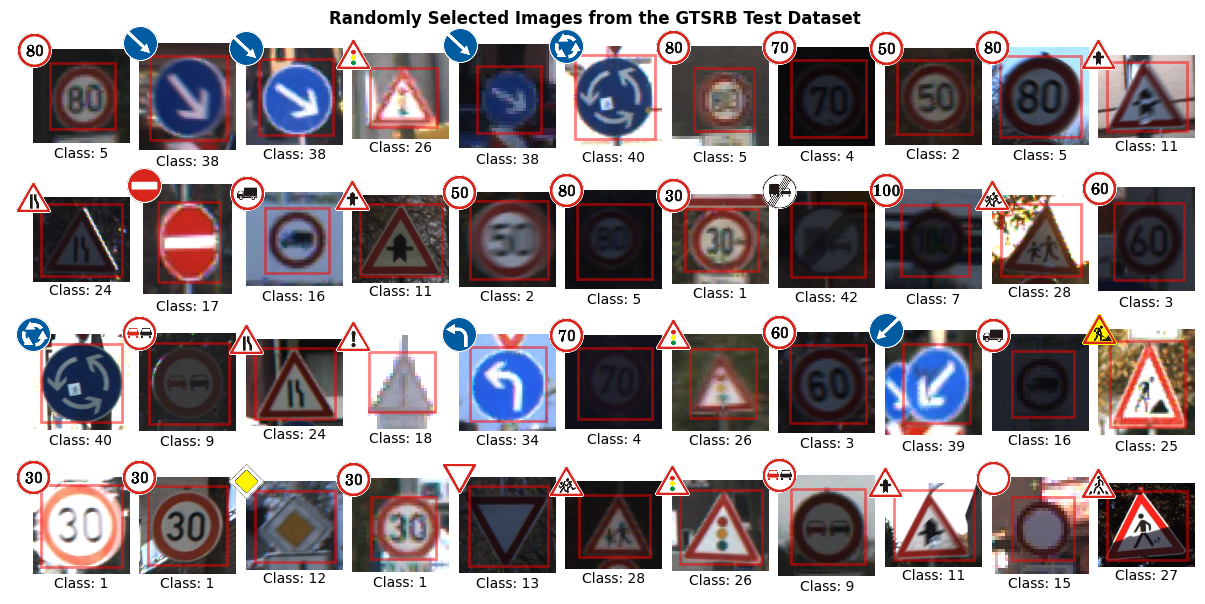

In [42]:
test_image_paths = os.listdir('Test')
selected_images = [os.path.join('Test', path) for path in random.sample(test_image_paths, 44)]

icons = [os.path.join('Meta', (str(x) + '.png')) for x in range(43)]
icons = [offsetbox.OffsetImage(plt.imread(icon), zoom = 0.25) for icon in icons]

fig, axes = plt.subplots(4, 11, figsize = (15, 7))

for i in range(44):
    image = plt.imread(selected_images[i])
    image_data = test.loc[test['Path'] == selected_images[i].replace('\\', '/')]
    image_class = image_data['ClassId'].values[0]

    x1 = image_data['Roi.X1'].values[0]
    x2 = image_data['Roi.X2'].values[0]
    y1 = image_data['Roi.Y1'].values[0]
    y2 = image_data['Roi.Y2'].values[0]
    width = x2 - x1
    height = y1 - y2
    xy = (x1, y1 - height)

    row = i // 11
    col = i % 11
    ax = axes[row][col]
    
    ax.imshow(image)
    ax.axis('off')
    ax.add_patch(Rectangle((xy), width, height, edgecolor = 'red', fill = False, lw = 2, alpha = 0.5))
    icon = offsetbox.AnnotationBbox(icons[image_class], (0, 0), frameon = False)
    ax.add_artist(icon)
    ax.text(0.5, -0.15, ('Class: ' + str(image_class)), transform=ax.transAxes, fontsize=10, ha='center')

plt.subplots_adjust(wspace = 0.1, hspace = 0.3)
fig.suptitle('Randomly Selected Images from the GTSRB Test Dataset', fontweight = 'bold', y = 0.925)
plt.show()

### **Data Augmentation**



In [43]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [44]:
img_size = 32

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(img_size, img_size),
  layers.Rescaling(1./255)
])

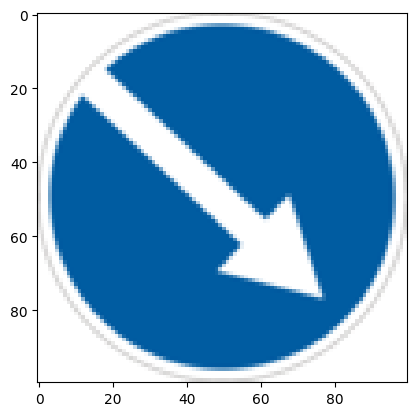

In [45]:
image = plt.imread("/content/Meta/38.png")
plt.imshow(image)

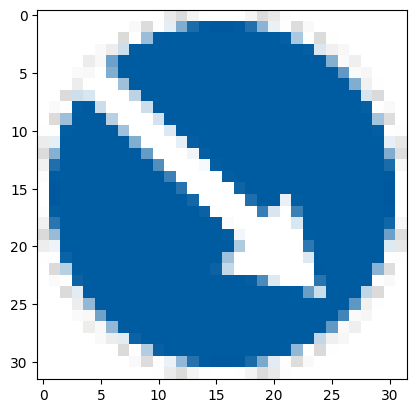

In [46]:
result = resize_and_rescale(image)
plt.imshow(result*255) #imshow / 255 by default

In [47]:
data_augmentation = tf.keras.Sequential([
  layers.Resizing(img_size, img_size),
  layers.Rescaling(1./255),
  layers.RandomRotation(factor=0.2,
                        fill_mode="constant",
                        )
])

In [48]:
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

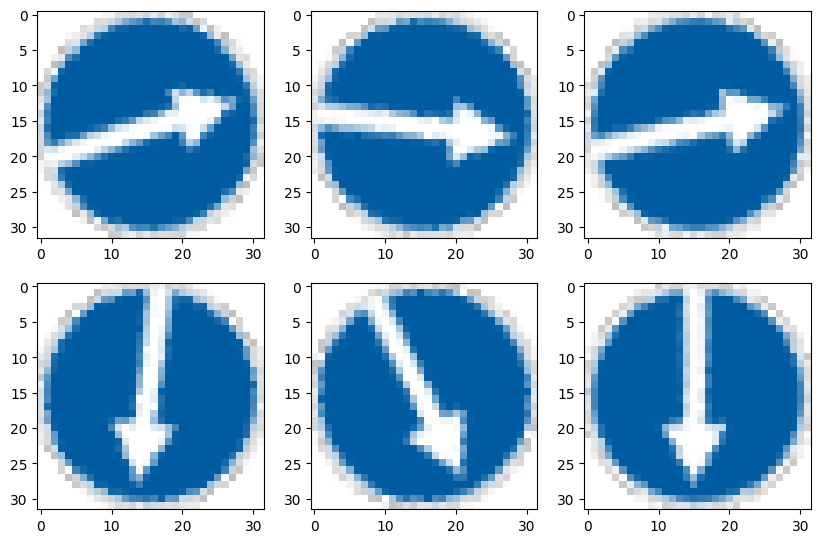

In [49]:
plt.figure(figsize=(10, 10))
for i in range(6):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0]*255)

In [50]:
data_augmentation2 = tf.keras.Sequential([
  layers.Resizing(img_size, img_size),
  layers.Rescaling(1./255),
  layers.RandomHeight(0.10),
  layers.RandomWidth(0.10)
])

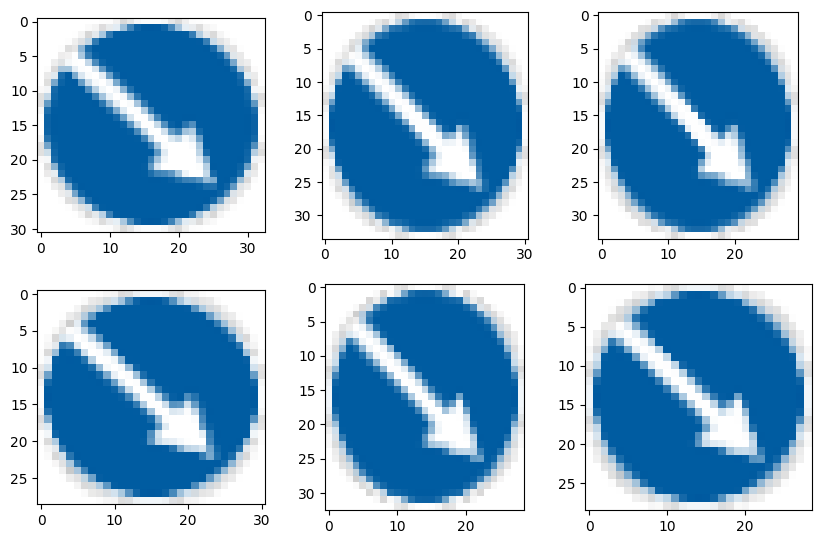

In [51]:
plt.figure(figsize=(10, 10))
for i in range(6):
  augmented_image = data_augmentation2(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0]*255)

In [52]:
data_augmentation3 = tf.keras.Sequential([
  layers.Resizing(img_size, img_size),
  layers.Rescaling(1./255),
  layers.RandomZoom(0.15)
])

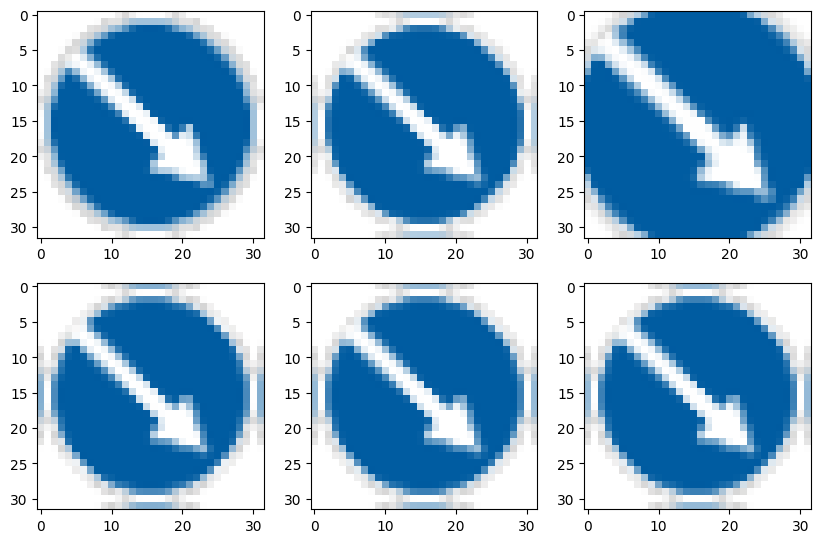

In [53]:

plt.figure(figsize=(10, 10))
for i in range(6):
  augmented_image = data_augmentation3(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0]*255)

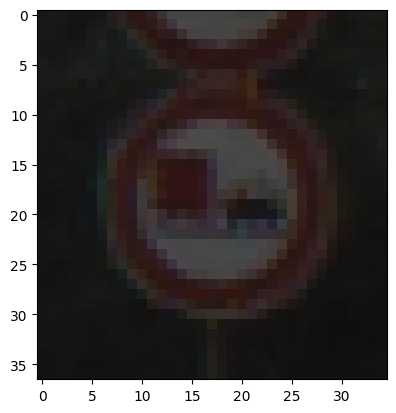

In [54]:
image2 = plt.imread("/content/Train/10/00010_00000_00001.png")#CHANGE THIS TO THE META ONES TO DRIVE HOME THE POINT ABOUT OVER ROTATION maybe do augmentation but with all
plt.imshow(image2)

In [55]:
image2 = tf.cast(tf.expand_dims(image2, 0), tf.float32)

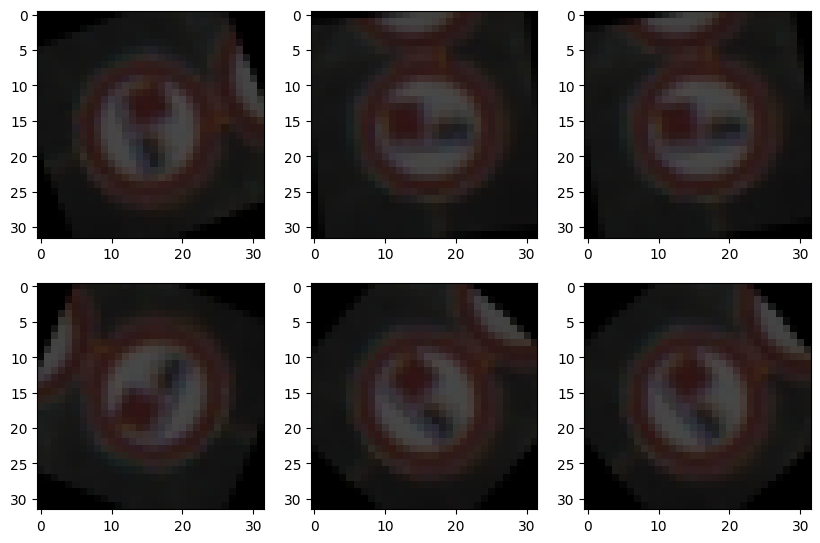

In [56]:
plt.figure(figsize=(10, 10))
for i in range(6):
  augmented_image = data_augmentation(image2)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0]*255)

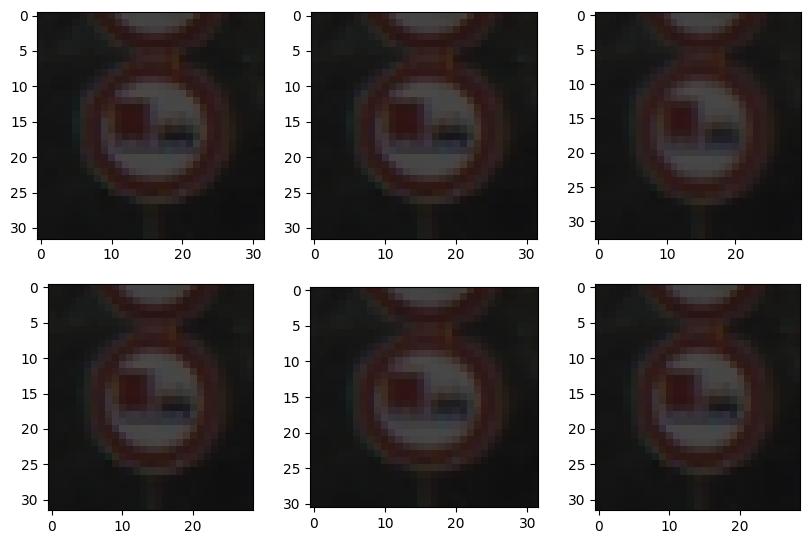

In [57]:
plt.figure(figsize=(10, 10))
for i in range(6):
  augmented_image = data_augmentation2(image2)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0]*255)

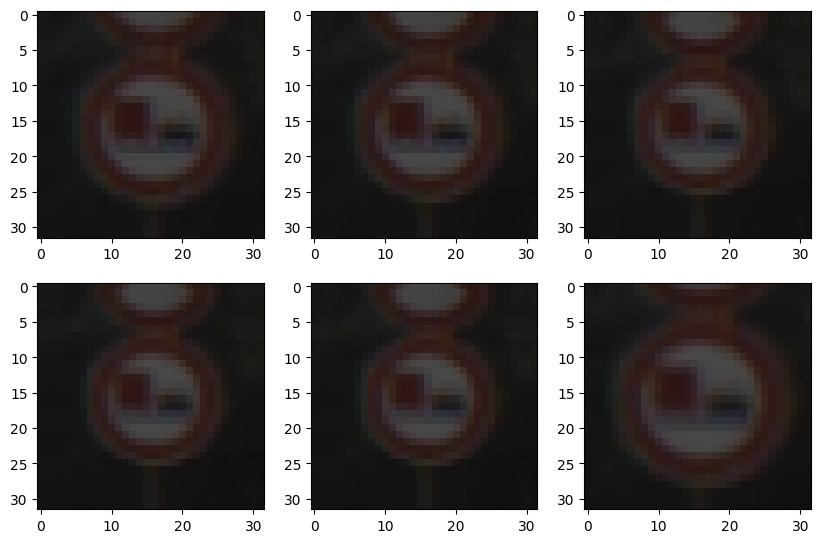

In [58]:
plt.figure(figsize=(10, 10))
for i in range(6):
  augmented_image = data_augmentation3(image2)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0]*255)